In [10]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay





%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
src_dir = 'C:\\Users\\USER\\Desktop\\Rock-Paper-Scissors\\rps-cv-images'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')

In [15]:
labels = ['paper','scissors','rock']

In [16]:
def input_target_split(train_dirs, labels):
    dataset = []
    count = 0
    for label, train_dir in zip(labels, train_dirs):
        for image in os.listdir(train_dir):
            img = load_img(os.path.join(train_dir, image), target_size=(128, 128))
            img = img_to_array(img)
            img = img / 255.0
            dataset.append((img, count))
       
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [17]:
train_dirs = [paper_dir, scissors_dir, rock_dir]

data_rps, labels_rps = input_target_split(train_dirs,labels)

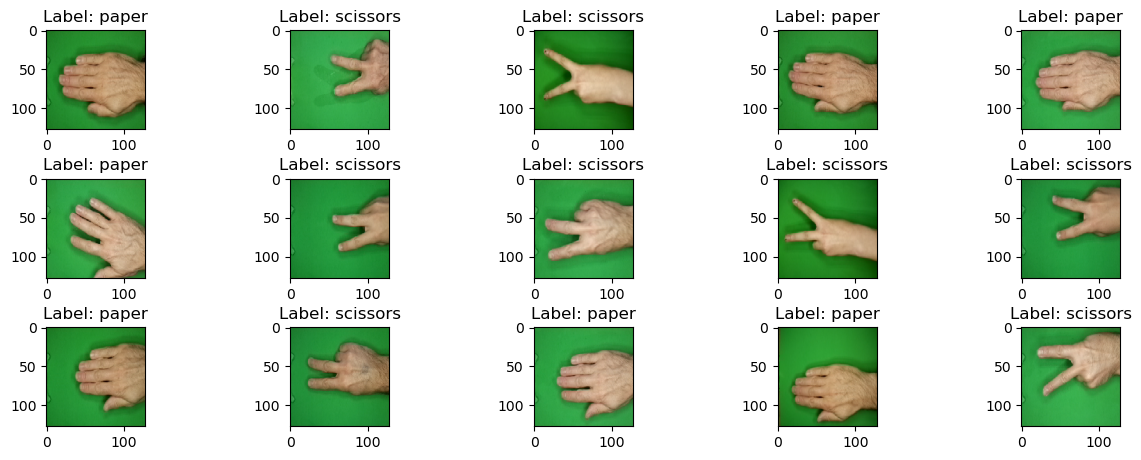

In [18]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(data_rps[i])
    plt.title(f'Label: {labels[labels_rps[i]]}')

# Label_names:
- 0: paper
- 1: scissors 
- 2: rock

In [19]:
data_rps_reshaped = data_rps.reshape(data_rps.shape[0], -1)

# Create a DataFrame with X_reshaped and y
df = pd.DataFrame(data=np.column_stack((data_rps_reshaped, labels_rps)), columns=[f'pixel_{i}' for i in range(data_rps_reshaped.shape[1])] + ['label'])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_49143,pixel_49144,pixel_49145,pixel_49146,pixel_49147,pixel_49148,pixel_49149,pixel_49150,pixel_49151,label
0,0.137255,0.447059,0.117647,0.121569,0.439216,0.117647,0.129412,0.447059,0.125490,0.129412,...,0.141176,0.470588,0.145098,0.152941,0.470588,0.149020,0.149020,0.466667,0.145098,0.0
1,0.180392,0.560784,0.247059,0.184314,0.564706,0.250980,0.172549,0.552941,0.231373,0.192157,...,0.192157,0.596078,0.247059,0.192157,0.588235,0.243137,0.188235,0.592157,0.243137,1.0
2,0.062745,0.364706,0.050980,0.066667,0.376471,0.058824,0.066667,0.384314,0.062745,0.074510,...,0.050980,0.317647,0.000000,0.050980,0.313726,0.000000,0.043137,0.309804,0.000000,1.0
3,0.145098,0.454902,0.137255,0.152941,0.443137,0.133333,0.149020,0.439216,0.125490,0.156863,...,0.160784,0.486275,0.137255,0.164706,0.474510,0.137255,0.164706,0.474510,0.137255,0.0
4,0.196078,0.541176,0.223529,0.196078,0.549020,0.235294,0.188235,0.541176,0.223529,0.196078,...,0.200000,0.576471,0.235294,0.211765,0.576471,0.243137,0.207843,0.580392,0.250980,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,0.145098,0.458824,0.156863,0.141176,0.447059,0.149020,0.149020,0.454902,0.156863,0.137255,...,0.164706,0.490196,0.168627,0.160784,0.486275,0.164706,0.160784,0.486275,0.164706,0.0
2184,0.694118,0.498039,0.278431,0.690196,0.482353,0.270588,0.698039,0.490196,0.274510,0.686275,...,0.160784,0.494118,0.125490,0.164706,0.498039,0.129412,0.164706,0.498039,0.129412,0.0
2185,0.196078,0.533333,0.203922,0.196078,0.533333,0.203922,0.188235,0.525490,0.200000,0.200000,...,0.211765,0.529412,0.207843,0.211765,0.529412,0.207843,0.211765,0.533333,0.200000,0.0
2186,0.129412,0.462745,0.164706,0.121569,0.462745,0.160784,0.125490,0.466667,0.164706,0.125490,...,0.145098,0.478431,0.176471,0.149020,0.482353,0.184314,0.149020,0.482353,0.184314,1.0


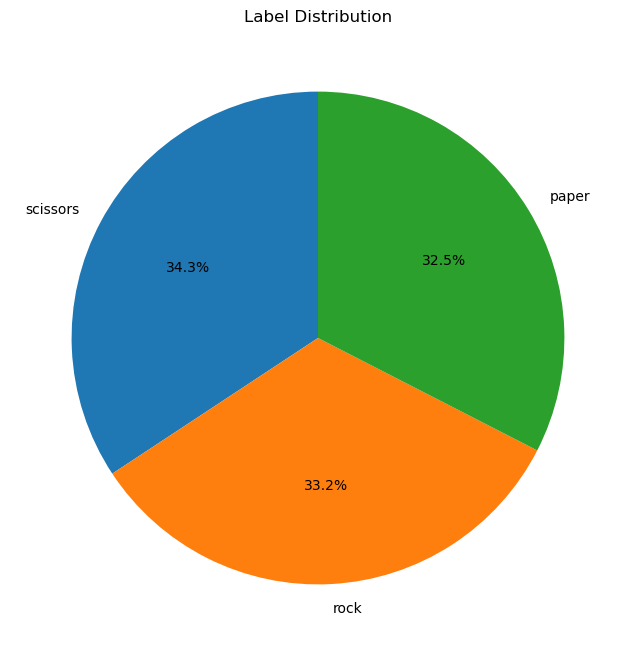

In [20]:

labels_num = df['label']

# Create a dictionary to map numerical labels to class names
label_names = {0: 'paper', 1: 'scissors', 2: 'rock'}

# Map numerical labels to class names in labels_num
class_labels = [label_names[label] for label in labels_num]

# Count the occurrences of each label
label_counts = pd.Series(class_labels).value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.show()

## We can understand is balanced, So we don't need to adjust it

In [21]:
print(data_rps.shape)
print(labels_rps.shape)

(2188, 128, 128, 3)
(2188,)


## We will convert the images from RGB to gray scale

In [22]:
# def convert_to_gray(images):
#     gray_images = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images]
#     return np.array(gray_images)

# # Convert data_rps to grayscale
# data_rps_gray = convert_to_gray(data_rps)

# # Check the new shape
# print(data_rps_gray.shape)

In [23]:
# num_images_to_display = 5
# for i in range(num_images_to_display):
#     plt.subplot(1, num_images_to_display, i + 1)
#     plt.imshow(data_rps_gray[i], cmap='gray')
#     plt.axis('off')

# plt.show()

In [24]:
# data_rps_gray = data_rps_gray.reshape((2188, 128*128))

## Split the data

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(data_rps_gray, labels_rps, test_size=0.25, random_state=42)
# print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_rps, labels_rps, test_size=0.25, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([549, 546, 546], dtype=int64)) (array([0, 1, 2]), array([163, 204, 180], dtype=int64))


## Dummy model

In [27]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,round(accuracy_score(y_pred,y_test),4))

The DummyClassifier score is: 0.298


## Split the train

In [28]:
# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train,y_train, test_size=0.25, random_state=42)

## Convolutional neural network (CNN)


## Without cross validation

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Split the data into training and validation sets
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train_reshaped, y_train, test_size=0.25, random_state=42)

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the CNN model
model = create_cnn_model()
model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/5
39/39 [==============================] - 9s 206ms/step - loss: 2.2755 - accuracy: 0.4593 - val_loss: 0.8444 - val_accuracy: 0.5888
Epoch 2/5
39/39 [==============================] - 8s 204ms/step - loss: 0.7729 - accuracy: 0.5992 - val_loss: 0.6612 - val_accuracy: 0.6010
Epoch 3/5
39/39 [==============================] - 8s 212ms/step - loss: 0.6194 - accuracy: 0.6203 - val_loss: 0.5834 - val_accuracy: 0.6302
Epoch 4/5
39/39 [==============================] - 8s 201ms/step - loss: 0.5125 - accuracy: 0.7789 - val_loss: 0.4361 - val_accuracy: 0.8856
Epoch 5/5
18/18 [==============================] - 1s 42ms/step - loss: 0.4785 - accuracy: 0.8483
Test Accuracy: 0.8482632637023926


## With cross validation

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold

# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define cross-validation parameters
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the CNN model
    model = create_cnn_model()
    model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f'Test Accuracy: {test_acc}')



Epoch 1/5
41/41 [==============================] - 9s 204ms/step - loss: 1.9058 - accuracy: 0.4345 - val_loss: 0.7900 - val_accuracy: 0.6657
Epoch 2/5
41/41 [==============================] - 8s 196ms/step - loss: 0.6953 - accuracy: 0.7744 - val_loss: 0.5861 - val_accuracy: 0.8207
Epoch 3/5
41/41 [==============================] - 8s 200ms/step - loss: 0.5086 - accuracy: 0.8537 - val_loss: 0.3931 - val_accuracy: 0.8815
Epoch 4/5
41/41 [==============================] - 8s 199ms/step - loss: 0.3687 - accuracy: 0.8864 - val_loss: 0.3115 - val_accuracy: 0.9027
Epoch 5/5
18/18 [==============================] - 1s 36ms/step - loss: 0.3357 - accuracy: 0.8903
Test Accuracy: 0.8903107643127441
Epoch 1/5
42/42 [==============================] - 9s 203ms/step - loss: 1.4128 - accuracy: 0.5880 - val_loss: 0.6236 - val_accuracy: 0.7835
Epoch 2/5
42/42 [==============================] - 9s 204ms/step - loss: 0.4208 - accuracy: 0.8606 - val_loss: 0.5518 - val_accuracy: 0.8110
Epoch 3/5
42/42 [=====

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (paper, scissors, rock)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define cross-validation parameters
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store loss and accuracy values during training
losses = []
accuracies = []

# Perform cross-validation
for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create and train the CNN model
    model = create_cnn_model()
    history = model.fit(X_train_fold, y_train_fold, epochs=5, validation_data=(X_val_fold, y_val_fold))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f'Test Accuracy: {test_acc}')

    # Store loss and accuracy values
    losses.extend(history.history['loss'])
    accuracies.extend(history.history['accuracy'])




Epoch 1/5
41/41 [==============================] - 10s 218ms/step - loss: 1.6836 - accuracy: 0.5511 - val_loss: 0.6014 - val_accuracy: 0.7508
Epoch 2/5
41/41 [==============================] - 9s 210ms/step - loss: 0.5524 - accuracy: 0.8133 - val_loss: 0.4115 - val_accuracy: 0.8754
Epoch 3/5
41/41 [==============================] - 9s 210ms/step - loss: 0.3950 - accuracy: 0.8872 - val_loss: 0.3559 - val_accuracy: 0.8815
Epoch 4/5
41/41 [==============================] - 9s 208ms/step - loss: 0.3028 - accuracy: 0.9154 - val_loss: 0.2615 - val_accuracy: 0.9149
Epoch 5/5
18/18 [==============================] - 1s 37ms/step - loss: 0.3271 - accuracy: 0.8958
Test Accuracy: 0.8957952260971069
Epoch 1/5
42/42 [==============================] - 9s 207ms/step - loss: 1.6414 - accuracy: 0.3382 - val_loss: 1.0986 - val_accuracy: 0.3323
Epoch 2/5
42/42 [==============================] - 8s 203ms/step - loss: 1.0987 - accuracy: 0.3328 - val_loss: 1.0986 - val_accuracy: 0.3323
Epoch 3/5
42/42 [====

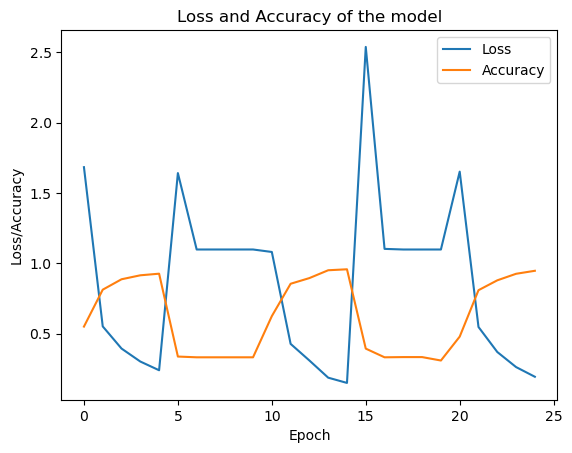

In [32]:
# Plot the loss and the accuracy
plt.figure()  # Create a new figure
plt.plot(losses)
plt.plot(accuracies)
plt.title('Loss and Accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(['Loss', 'Accuracy'])
plt.show()

## There is improvement with cross validation

18/18 [==============================] - 1s 37ms/step


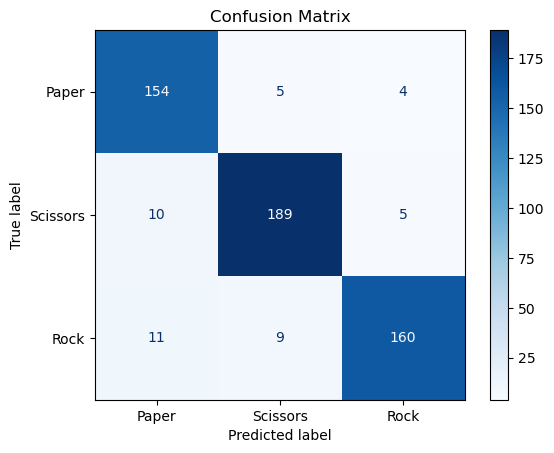

In [33]:
# Predict the labels for the test set
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
labels = ['Paper', 'Scissors', 'Rock']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()